In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#READING DATA SET

data = pd.read_csv("RealDataSet.csv")

In [35]:
# 1.1 : Replacing shortcuts.

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['LF'],'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['reg'],'Regular')

In [36]:
#Before filling missing values.
# data.head(10)

In [37]:
#1.2 : Filling missing values.
#Now filling the null values.
def imputing_numeric_missing_values(dataset,n_neighbors=10):
    numerical_column_names = dataset.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(dataset[numerical_column_names])
    
    dataset[numerical_column_names]=pd.DataFrame(knn_dataset)
    return dataset

dataset=imputing_numeric_missing_values(data)


In [38]:
# data.head(20)

In [39]:
#Adding missing values
dist = data.Outlet_Size.value_counts(normalize=True)
nan_outlet_rows = data['Outlet_Size'].isnull()
data.loc[nan_outlet_rows,'Outlet_Size'] = np.random.choice(dist.index, size=len(data[nan_outlet_rows]),p=dist.values)


In [40]:
#After filling out missing values
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007.0,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998.0,High,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007.0,Medium,Tier 2,Supermarket Type1
4,FDY38,14.618,Regular,0.118599,Dairy,234.2300,OUT027,1985.0,Medium,Tier 3,Supermarket Type3


In [41]:
#converting string values to numeric values.
# we have to convert following.
# here we convert the string based columns into integer or in numeric form.
#Converting to feature name
ord_enc = OrdinalEncoder()
enc = LabelEncoder()   

enc.fit(data['Item_Type']) 
data["Item_Type"] = ord_enc.fit_transform(data[["Item_Type"]])

enc.fit(data['Outlet_Type']) 
data["Outlet_Type"] = ord_enc.fit_transform(data[["Outlet_Type"]])

enc.fit(data['Outlet_Location_Type']) 
data["Outlet_Location_Type"] = ord_enc.fit_transform(data[["Outlet_Location_Type"]])

enc.fit(data['Outlet_Size']) 
data["Outlet_Size"] = ord_enc.fit_transform(data[["Outlet_Size"]])


# we have columns named : Item_Fat_Content to be just binarize
diag_map = {'Low Fat':1, 'Regular':0}
data['Item_Fat_Content'] = data['Item_Fat_Content'].map(diag_map)




In [49]:
#After convergion of string values to numeric form ... Ordinal -> numeric conversion
# data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5615 non-null   float64
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   float64
 6   Outlet_Size                5681 non-null   float64
 7   Outlet_Location_Type       5681 non-null   float64
 8   Outlet_Type                5681 non-null   float64
dtypes: float64(9)
memory usage: 399.6 KB


In [43]:
#Now standarizing some specific columns.
#Since we have decided to keep Outlet_Type 
#for classification purposed. So except this 
#and columns which are showing labels or behaving like
#categorical data we will not convert them.
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
# data[['Item_Weight', 'Item_Visibility','Item_MRP']] = min_max_scaler.fit_transform(data[['Item_Weight', 'Item_Visibility','Item_MRP'] ])



In [44]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1.0,0.007565,13.0,107.8622,OUT049,1999.0,1.0,0.0,1.0
1,FDW14,8.300,0.0,0.038428,4.0,87.3198,OUT017,2007.0,1.0,1.0,1.0
2,NCN55,14.600,1.0,0.099575,11.0,241.7538,OUT010,1998.0,0.0,2.0,0.0
3,FDQ58,7.315,1.0,0.015388,13.0,155.0340,OUT017,2007.0,1.0,1.0,1.0
4,FDY38,14.618,0.0,0.118599,4.0,234.2300,OUT027,1985.0,1.0,2.0,3.0
5,FDH56,9.800,0.0,0.063817,6.0,117.1492,OUT046,1997.0,2.0,0.0,1.0
6,FDL48,19.350,0.0,0.082602,0.0,50.1034,OUT018,2009.0,1.0,2.0,2.0
7,FDC48,10.225,1.0,0.015782,0.0,81.0592,OUT027,1985.0,1.0,2.0,3.0
8,FDN33,6.305,0.0,0.123365,13.0,95.7436,OUT045,2002.0,2.0,1.0,1.0
9,FDA36,5.985,1.0,0.005698,0.0,186.8924,OUT017,2007.0,2.0,1.0,1.0


In [45]:
#Columns before making selection.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5615 non-null   float64
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   float64
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   float64
 8   Outlet_Size                5681 non-null   float64
 9   Outlet_Location_Type       5681 non-null   float64
 10  Outlet_Type                5681 non-null   float64
dtypes: float64(9), object(2)
memory usage: 488.3+ KB


In [46]:
#Now making selection of features.
# We will drop two columns which are just showing the IDs.
to_drop = ['Item_Identifier','Outlet_Identifier']
data.drop(to_drop, axis=1, inplace=True)


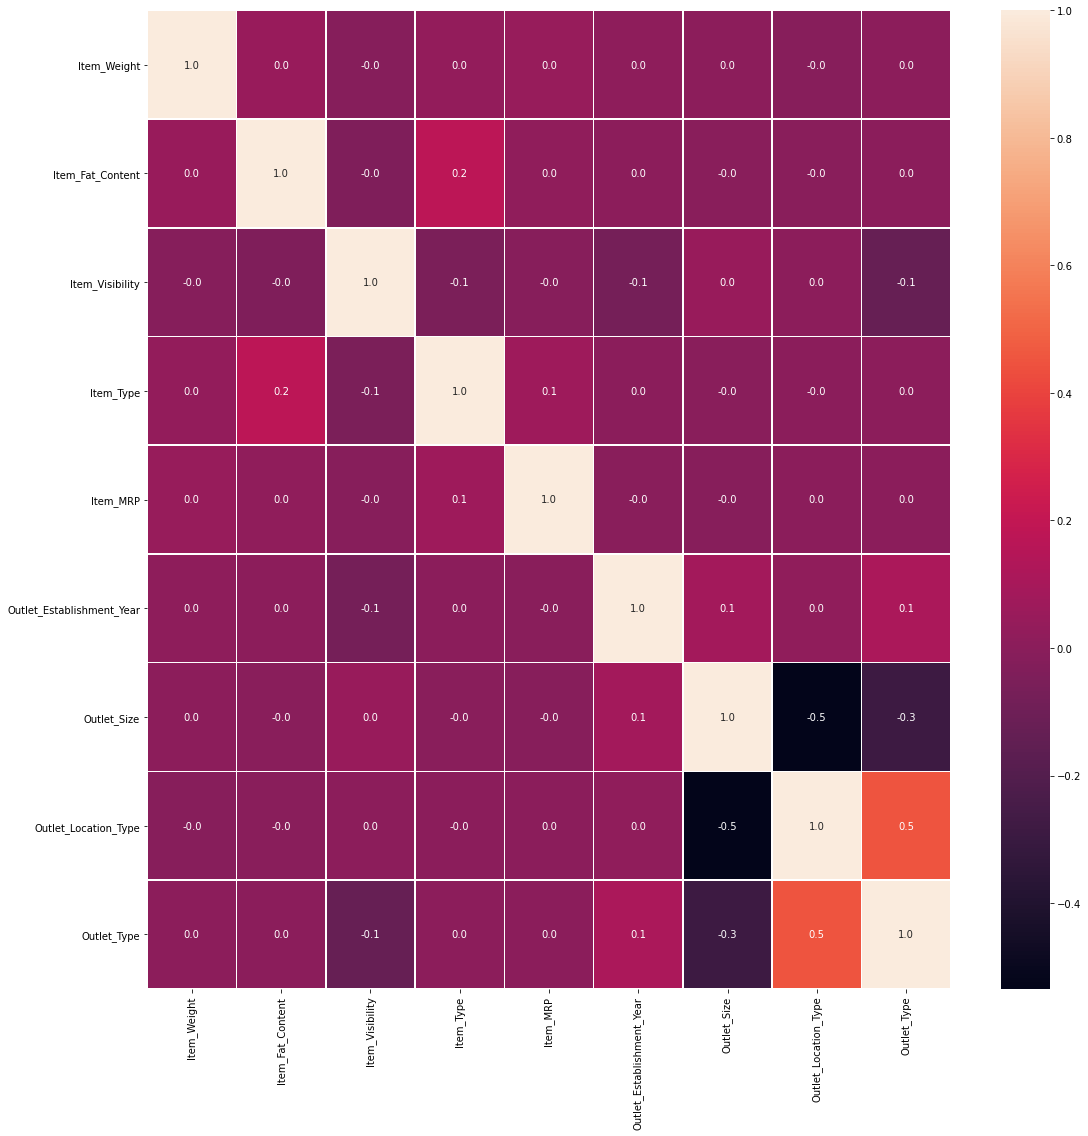

In [47]:
#And for rest of selection we will data the co-relation graph.
# Now ploting the graph
def draw_heatmap(dataset):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = dataset.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    #plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=data.select_dtypes(numerics)
numerical_column_names = data.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)

In [48]:
#generating the CSV file
# data.to_csv ('Dataset_01_standarized_.csv', index = False, header=True)
data.to_csv ('Dataset_01_non_standarized_.csv', index = False, header=True)